In [10]:
from IPython.display import Image

import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import itertools


Unable to revert mtime: /Library/Fonts


### Probability Models

* A way to reason about a probabilistic system from various perspectives. 

* E.g., you want to run an ad campaign through an agency. You may be interested in:
    * What is the average number of new clients we should expect to see after the ad campaign 
    * Determine the amount of variability you should expect to see in the system
      * How variable is that number? Ex. a value 300-400 is more informative than 100-1,000
    * Compute probability of events
      * What is the probability of having more than X new clients after a given ad campaign
      
Note and remember these three components: 
  * Some summary information about the experiment
  * Variability (variance) around that statistic
  * Computing probability of certain events

In [ ]:
### Probability Models: Example

* E.g., you want to run an ad campaign through an agency and are interested in:
    1. Average number of new clients after an ad campaign
    2. Variability around that number
    3. The probability of having at least X participants.

* We can repeat the ad campaign a large number of times and answer each of these questions


```python
    nb_new_participants = [500, 800, 860, 820, 840, 760, 430,...]
```


### Probability Models: Example

```python
    nb_new_participants = [500, 800, 860, 820, 840, 760, 430,...] 
```

1. Average number of new clients after an ad campaign
```python
np.mean(nb_new_participants)
```
2. Variability around that number
```python
np.var(nb_new_participants)
```
3. The probability of having at least X participants.
```python
    sum(array(nb_new_participants)> X) / len(nb_new_participants)
```

### Probability Models: Example - Cont'd

* The same information is contained in the visualization of the data
  * What does every single bar mean? 
  * How can you get an idea of the `mean`, `variance`, and probability of at least X participants?

<img src="https://www.dropbox.com/s/1peh2gcvkrtcqba/clients_ad_campaign.png?dl=1" style="width:600px;">



### Probability Distributions

* At the heart of probability models are _probability_ _distributions_ and _random_ _variables_

* Consider the loaded die with the following probabilities:
```
    p(1) = 0.3/6
    p(2) = 0.7/6
    p(3) =   2/6
    p(4) = 0.5/6
    p(5) = 0.2/6
    p(6) = 2.3/6
```

* We could think of outcomes above as the values returned by the function that takes as input a value in `(1,2,3,4,5,6)` and returns the relavant probability from the list `[0.3/6, 0.7/6, 2/6, 0.5/6, 0.2/6, 2.3/6]`

* Example:
```python
    def loaded_die_distribution (face):
    try:
        dist = {1:0.3/6, 2:0.7/6, 3:2/6, 4:0.5/6, 5:0.2/6, 6:2.3/6}
        return dist[face]
    except:
        raise("%s is not a valid die face %d" % face)
```



### Probability Distributions - Cont'd

* Such a function is called a probability distribution
* In essence, a probability distribution is a numerical function that assigns probabilities (y-axis in [0-1]) to events in the sample space S (x-axis)
  * Set of sample space values as _domain_ (numerical or not) 


In [5]:
def loaded_die_distribution (face):
    try:
        dist = {1:0.3/6, 2:0.7/6, 3:2/6, 4:0.5/6, 5:0.2/6, 6:2.3/6}
        return dist[face]
    except:
        raise("%s is not a valid die face %d" % face)

Text(0, 0.5, 'probability')

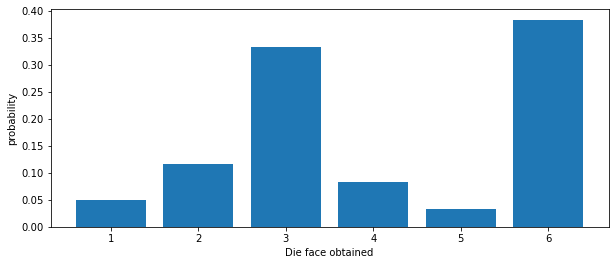

In [6]:
sample_space = list(range(1,7))
p_x = [loaded_die_distribution (f) for f in sample_space]

plt.figure(figsize=(10, 4))
plt.bar(sample_space, p_x)

plt.xlabel('Die face obtained')
plt.ylabel('probability')

### Sampling from the Biased Die

- Given our probability distribution, we are four times more likely to draw a 3 than we are to draw a 4
- To sample die rolls, we need to encode our probability distribution to reflect the bias in our die
  - This can be easily done using the `choice()` function in `np.random`

```python
np.random.choice([1, 2, 3, 4, 5, 6], p=[0.3/6, 0.7/6, 2/6, 0.5/6, 0.2/6, 2.3/6])
```

In [7]:
import random
for _ in range(20):
    print (np.random.choice([1, 2, 3, 4, 5, 6], 
                            p=[0.3/6, 0.7/6, 2/6, 0.5/6, 0.2/6, 2.3/6]
                           ), 
           end= ' ')


6 6 6 6 4 6 2 6 3 4 6 2 2 6 6 5 6 3 6 3 

### Random Variables

* Using CS thinking, a random variable is merely a variable (a RAM space, or box for a value) that can take values that are variable (random)
  * In probabilistic thinking, a random variable is a variable that can take any value from the sample space of the experiment as determined by the probability distribution.
    
  * I.e., the value assigned to the variable depends on a random process    
  ```python
      # randomly select a value according to a probability distribution
      dieRollVal = np.random.choice([1, 2, 3, 4, 5, 6], p=[0.3/6, 0.7/6, 2/6, 0.5/6, 0.2/6, 2.3/6]);
  ```


### Random Variables- Cont'd

* In a non-probabilistic program, you can trace the value contained in a variable

* In a probabilistic program, you cannot since the value is determined probabilistically
  * We don't know what that variable will contain prior to executing the code
  * We can however reason about what the value will most likely contain


* Take for instance the variable `roll_random_var` in the code below:

```python
import random
for i in range(10):
    roll_random_var = np.random.choice([1, 2, 3, 4, 5, 6], 
                                       p=[0.3/6, 0.7/6, 2/6, 0.5/6, 0.4/6, 2.1/6])
    print (f"roll_random_var contains the value {roll_random_var}")
```

* The variable `roll_random_var` is a _random_ _variable_
  * The values assigned to it are determined probabilistically using a probability distribution of the biased die
 

In [7]:
for i in range(3):
    roll_random_var = np.random.choice([1, 2, 3, 4, 5, 6], 
                                       p=[0.3/6, 0.7/6, 2/6, 0.5/6, 0.4/6, 2.1/6])
    print ("roll_random_var contains the value %s" % roll_random_var)


roll_random_var contains the value 3
roll_random_var contains the value 3
roll_random_var contains the value 6


{1: 225, 2: 599, 3: 1721, 4: 409, 5: 348, 6: 1698}


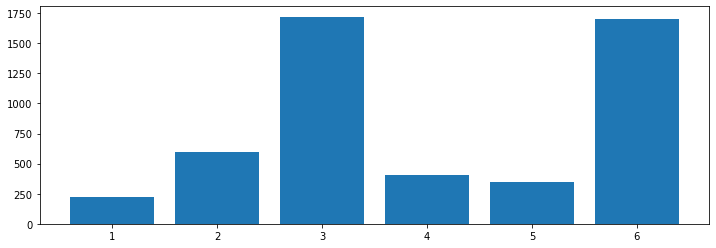

In [44]:
from collections import Counter
roll_random_var_list = []
for i in range(5000):
    roll_random_var = np.random.choice([1, 2, 3, 4, 5, 6], 
                                       p=[0.3/6, 0.7/6, 2/6, 0.5/6, 0.4/6, 2.1/6])
    roll_random_var_list.append(roll_random_var)

counts = Counter(roll_random_var_list)

sorted_counts = dict(sorted(counts.items()))
print(sorted_counts)
plt.figure(figsize=(12,4))
_ = plt.bar(sorted_counts.keys(), sorted_counts.values())


### Two types of random variables

  * Discrete (finite or countably infinite)
     * Take as input finite countably finite integer values and return probabilities for those events
     * Ex. Number of accidents on H1 on any given day, number of customers at lunchtime at Starbucks on campus, number of siblings a student at UH has, etc.
     
  * Continuous (uncountably infinite)
     * Take as input uncountably infinite float value and returns a probability density
     * Ex. Height, weight, time, etc..
       * The sample space is infinite.
     


### Two Types of Random Variables 


* Discrete and continuous random variables have commonly occurring distributions
  * These distributions are simply functions -- just like the one encoded above -- that give the "probability" for each element in the sample space

* Perhaps two of the most popular distributions are the binomial and the normal (or Gaussian)



### The Binomial Distribution (The `"Hello World"` Probability Distribution)

* A binomial distribution is simply the probability of number of SUCCESS outcomes in an experiment that is repeated multiple times. 
  * $m$ successes in an experiment of $n$ fixed, independent trials.

* Each trial has a probability of success $p$ and a probability of failure $1-p$ (heads and tails; 0 and 1; etc...) 



####  Examples of the Binomial Distribution

- You flip a fair coin 100 times, what is the probability of observing 27 heads?

- Given an ad clickthrough probability of $p=0.6$ what is the probability of having 100 clicks if we show the add 1000 times?

- Given a disease prevalence of $p=0.05$, what is the probability of observing the disease in at least 100 individuals if we survey 5000 randomly selected individuals from the population? 


- What are $p$, $n$ and  $m$ in each of these experiments?

### Simple Probability Distribution

* Let $X$ be the random variable representing the number of heads obtained from flipping a fair coin 5 times.  

* What is the sample space of this experiment? 

  - This amounts to computing the product of $[H,T]^5$, or $[H,T] \times [H,T] \times [H,T] \times [H,T] \times [H,T]$


[('H', 'H', 'H', 'H', 'H'),
 ('H', 'H', 'H', 'H', 'T'),
 ('H', 'H', 'H', 'T', 'H'),
 ('H', 'H', 'H', 'T', 'T'),
 ('H', 'H', 'T', 'H', 'H'),
 ('H', 'H', 'T', 'H', 'T'),
 ('H', 'H', 'T', 'T', 'H'),
 ('H', 'H', 'T', 'T', 'T'),
 ('H', 'T', 'H', 'H', 'H'),
 ('H', 'T', 'H', 'H', 'T'),
 ('H', 'T', 'H', 'T', 'H'),
 ('H', 'T', 'H', 'T', 'T'),
 ('H', 'T', 'T', 'H', 'H'),
 ('H', 'T', 'T', 'H', 'T'),
 ('H', 'T', 'T', 'T', 'H'),
 ('H', 'T', 'T', 'T', 'T'),
 ('T', 'H', 'H', 'H', 'H'),
 ('T', 'H', 'H', 'H', 'T'),
 ('T', 'H', 'H', 'T', 'H'),
 ('T', 'H', 'H', 'T', 'T'),
 ('T', 'H', 'T', 'H', 'H'),
 ('T', 'H', 'T', 'H', 'T'),
 ('T', 'H', 'T', 'T', 'H'),
 ('T', 'H', 'T', 'T', 'T'),
 ('T', 'T', 'H', 'H', 'H'),
 ('T', 'T', 'H', 'H', 'T'),
 ('T', 'T', 'H', 'T', 'H'),
 ('T', 'T', 'H', 'T', 'T'),
 ('T', 'T', 'T', 'H', 'H'),
 ('T', 'T', 'T', 'H', 'T'),
 ('T', 'T', 'T', 'T', 'H'),
 ('T', 'T', 'T', 'T', 'T')]

In [18]:
product  = list(itertools.product(['H', 'T'], repeat=5))
print("Sample space is of size %s " % len(product))
print ("The sample space is:\n")
for prod in product:    
    print("".join(prod), end=" ")


Sample space is of size 32 
The sample space is:

HHHHH HHHHT HHHTH HHHTT HHTHH HHTHT HHTTH HHTTT HTHHH HTHHT HTHTH HTHTT HTTHH HTTHT HTTTH HTTTT THHHH THHHT THHTH THHTT THTHH THTHT THTTH THTTT TTHHH TTHHT TTHTH TTHTT TTTHH TTTHT TTTTH TTTTT 

### Manually Deriving the Probability Distribution

* We are interested in the probability distribution of obtaining `X` heads in 5 coin flips
  * _Binomial_ distribution with n=5 and $p=0.5$

- Our sample space is [0, 1, 2, 3, 4, 5]

- There are $2^5 = 32$ outcomes.



### Manually Deriving the Probability Distribution - Cont'd

  * There is 1 way of obtaining 0 heads: TTTTT <br/>
     $p(H=0) = 1/32$
  * There 5 ways of obtaining 1 head: HTTTT, THTTT, TTHTT, TTTHT, TTTTH.  <br/>
     $p(H=1) = 5/32$
  * Similarly, there are 10 ways of obtaining 2 heads: HHTTT, HTHTT, HTTHT, HTTTH, …. TTTHH <br/>
     $p(H=2) = 10/32$
  * ...



### Manually Deriving the Probability Distribution - Cont'd

* In general, the number of ways we can obtain $m$ heads from $n$ flips is given by the binomial cofficient ${n}\choose{m}$ (read as n choose m), which is given by:

$$
{{n}\choose{m}} = \frac{n!}{m!(n-m)!}
$$

E.g.: the for $n=5$ and $m=2$, we have

\begin{equation} 
\begin{split}
{{5}\choose{2}} & = \frac{5!}{2!(5-2)!} \\
                & = \frac{5\times4\times3\times2 \times 1}{2 \times 1 \times 3 \times 2 \times 1} \\
                & = \frac{5 \times 4}{2 \times 1} \\
                & = 10 
\end{split}
\end{equation}




<BarContainer object of 6 artists>

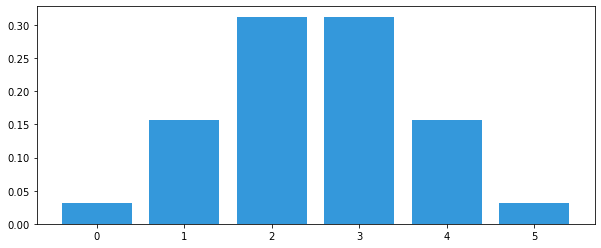

In [3]:
sample_space = [0, 1, 2, 3, 4, 5 ]
p_x = [1.0/32, 5.0/32, 10.0/32, 10.0/32, 5.0/32, 1.0/32]

plt.figure(figsize=(10, 4))
plt.bar(sample_space, p_x ,  color = "#3498db", )
#ax.set(xlabel='number of heads in 5 coin flips', ylabel='probability')

#### Binomial with Biased Coin

- What if the coin is biased? Example $p(H) = 0.7$ and $p(T) = 0.3$.

- What is the probability of obtaining 1 head in 5 coin flips with this biased coin?
  

#### Bernouilli Distribution


- Recall from elementary statistics and discrete math that the Bernouilli distribution, which states that:

$$
 f(k;p)=p^{k}(1-p)^{1-k}\quad {\text{for }}k\in \{0,1\}
$$


* $k=1$ is head,  $1- k=0$ is tail, and $p$ is the probability of head.

* Based on the Bernouilli euqaiton above, the probability of obtaining a head ($k=1$ ) is: 
$$Pr(1; p) = p^1 \times (1-p)^0 = p$$

* and the probability of obtaining a tail ($k=0$ and $1-k = 1$) is:

$$Pr(0; p) = p^k \times (1-p)^{1-k} = p^0 \times (1-p)^1 = 1-p$$ 

* This matches our intuition about the probability of a coin landing head




#### Binomial with Biased Coin - Cont'd

- What if coin is biased? Example $p(H) = 0.7$ and $p(T) = 0.3$.

- What is the probability of obtaining 1 head in 5 coin flips with this biased coin?
  
  
$$
p(H=1) ={{5}\choose{1}}~~~p(H)^1 * p(T)^4   
$$

* The five possible ways to ontain a 1 head and 4 tails:HTTTT, THTTT, TTHTT, TTTHT, TTTTH

$$
p(H=1) = 5  \times 0.7 \times 0.3^4 = 0.02835
$$



### The Binomial Distribution - Cont'd

* The equation above can be generalized to any number of trials $n$ any probability of heads $p(H)$

* We will write $p(H)$ as $p$ and $p(T)$ as $(1-p)$
  
    $p(H=k) ={{n}\choose{k}} p^k * (1-p)^{n-k}$

* This equation is the probability function for a random variable distributed according to a binomial distribution

  * Think of it as a convenient function to assign probabilities to any value in the sample space


#### The Binomial Distribution - Cont'd

- A probability distribution can be derived from first principles for many other `canonical` distributions

- These functions allow us to compute probabilities for events seamlessly
  - A by-product is that we can also derive expected values, probabilities for subspace, use them to sample from that distribution, etc...
  

#### The Binomial Distribution - Cont'd

- We can easily model (reason about) a problem that fits the binomial since we have access to the distribution

  * E.g., assume the probability of subscribing to a monthly plan in your app is  $p=0.05$. 
  * If, on average, 10k users download your app each month, how many (on average) subscribed users will you have after 1 year?
  * What is the probability of having at least 3000 users
  * You can use this simple model to derive various valuable insights about your app
  * E.g. total revenue after one year, the number of servers you will need to support your user base, the number of customer service employees to support your clientele, etc.


* Once we know the parameter of the distribution (e.g., here p=0.05), it's easy to answer the questions above. 
  * This may be trivial in some cases and challenging in others
  * How did we get the $p=0.05$? How sure are we of that value? How likely is it to be $p=0.06$ instead?


### Probability Distributions for Discrete Random Variables

- A probability distribution for a discrete random variable is called probability mass function (__pmf__) 

  - `pmf`s take a discrete random variable $X$ and assign a probability to each value of its sample space

- A probability distribution can be derived from first principles for many other canonical distributions

- These functions allow us to compute probabilities for events seamlessly

  - A by-product is that we can also derive expected values, probabilities for subspace, use them to sample from that distribution, etc...
  




### `pmf` in Python

- Programming languages and data analysis software commonly support popular PMFs

- The common graphical representation for a `pmf` is a histogram
- The X-axis contains observed values 
- The Y-axis shows the probability for  the corresponding X-values


In [20]:
from scipy.stats import binom

n = 5 
p = 0.7
binom.pmf(1, n, p)


0.02834999999999999

In [27]:
x

range(0, 5)

0.9999999999999999


Text(0, 0.5, 'Probility')

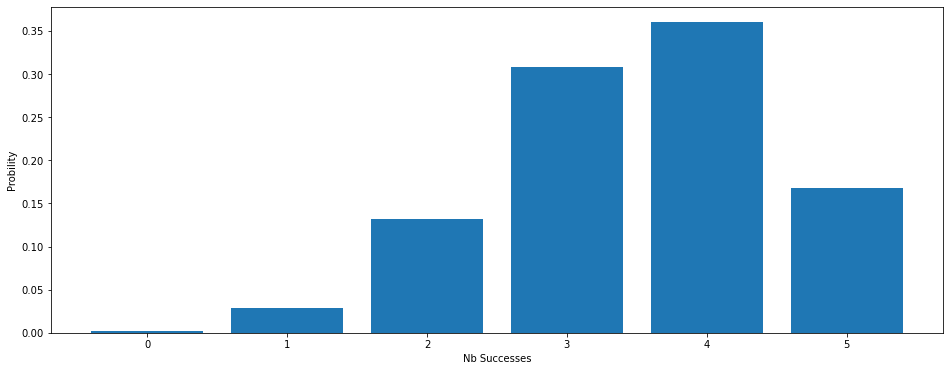

In [33]:
x = range(n+1)
p_x =  [binom.pmf(val, n, p) for val in x]


print(sum(p_x))
plt.figure(figsize=(16,6))

plt.bar(x, p_x)
plt.xlabel("Nb Successes")
plt.ylabel("Probility")


### Example
- Given a biased coin with that comes up heads with a probability ($p=0.4$) 
- If you flip the coin $100$ times, what is the probability of observing 42 heads?

In [22]:
from scipy.stats import binom
n = 100 
p = 0.4
print(binom.pmf(42, n, p))

0.0742071940343827


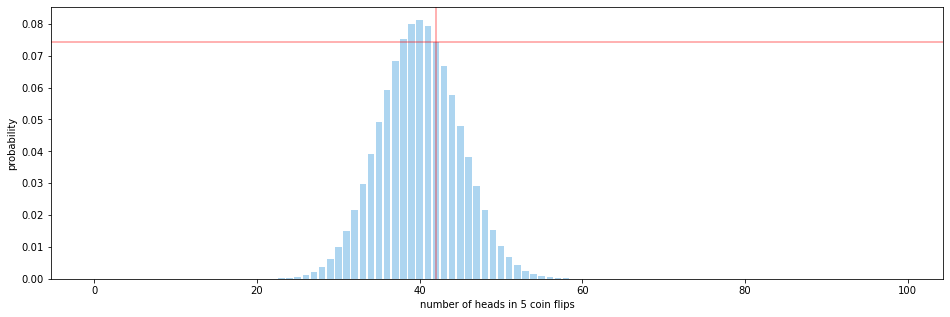

In [41]:
n = 100 
p = 0.4

x = range(n) # our x-axis

p_x =  [binom.pmf(val, n, p) for val in x]  # our y-axis

plt.figure(figsize=(16, 5))

plt.bar(x, p_x , color ="#3498db", alpha=0.4)

# Add the horizontal and vertical bars
x_val = 42
y_val = binom.pmf(42, n, p)

# print(y_val)

plt.axvline(x_val, color = 'r', alpha=0.4)

plt.axhline(y_val, color = 'r', alpha=0.4)



plt.xlabel('number of heads in 5 coin flips')
_ = plt.ylabel('probability')

### Summary: `X`, `n`, `p` and the `pmf` 
- The number of observed successes is said to be a random variable $X$,  distributed as a binomial distribution. 

- We write the above statment as: 
$$ 
X \sim Binomial(n,p)
$$

- This simply means that: 

  - The random variable $X$ takes on values in the sample space describes as a binomial distribution
    - The sample space here is countably finite and range from $0$ to $n$
  - The parameters of the binomial probability distributions are $n$, $p$

### Comparing Distributions

* Binomial distributions parameterized with different values of $n$ and $p$ will produce different `pmf`s

![](https://www.dropbox.com/s/si1fb0lx9vse028/two-distributions.png?dl=1)

* Therefore, it is important to describe a PMF's parameters when describing it
  * Modifying these parameters results in a different probability distribution

Text(0, 0.5, 'Probability')

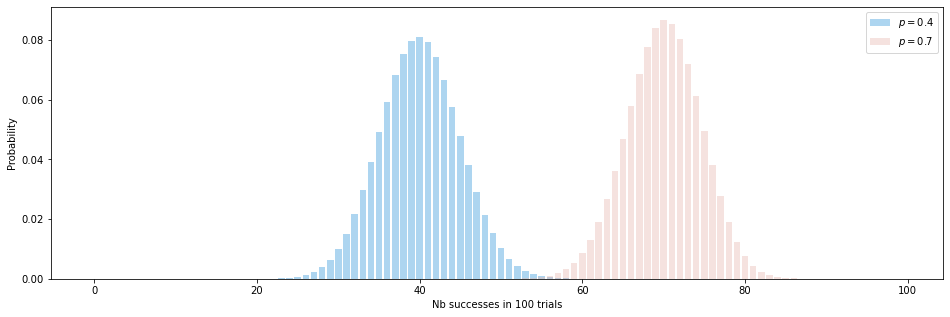

In [31]:
n = 100 
p = 0.4
x = range(n) # our x-axis
p_x =  [binom.pmf(val, n, p) for val in x]  # our y-axis
plt.figure(figsize=(16, 5))
plt.bar(x, p_x , color ="#3498db", alpha=0.4, label="$p=0.4$")
p = 0.7
p_x =  [binom.pmf(val, n, p) for val in x]  # our y-axis
plt.bar(x, p_x , color ="#e6b8af", alpha=0.4, label="$p=0.7$")
plt.legend()
plt.xlabel("Nb successes in 100 trials")
plt.ylabel("Probability")